# Principal Component Analysis
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Principal Component Analysis** and apply it to **restore rotated CAPTCHA**
- play with **Eigenface** by applying PCA on a real world face dataset
- use PCA to do **dimension reduction**. Evaluate the loss of information qualitatively and quantitatively

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Now let's hack the rotated CAPTCHA!

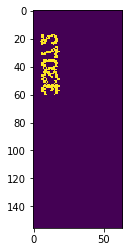

In [2]:
from hack_pca import hack_pca

# Hack different images yourself
img = hack_pca('1.gif')
plt.imshow(img)

## Apply PCA on face image

In [3]:
# load data
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train']
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
# YOUR CODE HERE

# 1. Feature preprocessing
# begin answer
print(fea_Train.shape, gnd_Train.shape[0])
# end answer

(200, 1024) 200


C:\Users\ly\Desktop\ML_dc\ml2018winter_hw4\pca\show_face.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  = fea[i * numPerLine + j, :].reshape((faceH, faceW)).transpose()


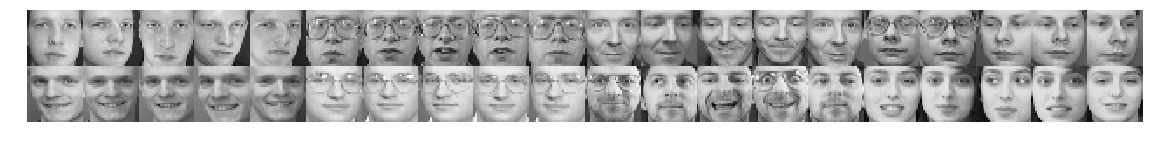

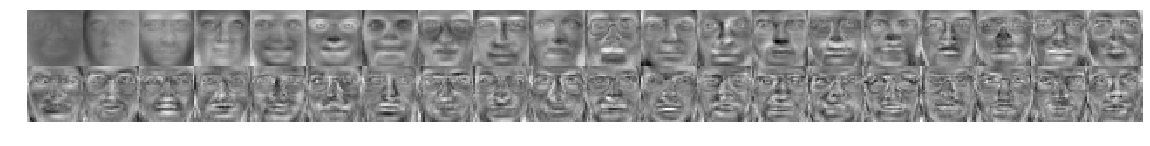

In [4]:
# 2. Run PCA
# begin answer
from pca import PCA
Eigenval, Eigenface = PCA(fea_Train)
# end answer
# 3. Visualize eigenface
# begin answer
from show_face import show_face
show_face(fea_Train)
show_face(Eigenface.T)
# end answer

In [5]:
# 4. Project data on to low dimensional space
# begin answer
from knn import knn
dimension = [8, 16, 32, 64, 128, 256, 512]

for dim in dimension:
    dim_eigenface = Eigenface[:,:dim]
    train_data = np.matmul(fea_Train, dim_eigenface)
    test_data = np.matmul(fea_Test, dim_eigenface)
    label = knn(test_data, train_data, gnd_Train, 1)
    test_error = np.sum(label != gnd_Test) / gnd_Test.shape[0]
    print('reduced dimensionality {}: test error = {}'.format(dim, test_error));
# end answer

# 5. Run KNN in low dimensional space
# begin answer
# end answer

reduced dimensionality 8: test error = 0.245
reduced dimensionality 16: test error = 0.2
reduced dimensionality 32: test error = 0.18
reduced dimensionality 64: test error = 0.15
reduced dimensionality 128: test error = 0.15
reduced dimensionality 256: test error = 0.15
reduced dimensionality 512: test error = 0.15


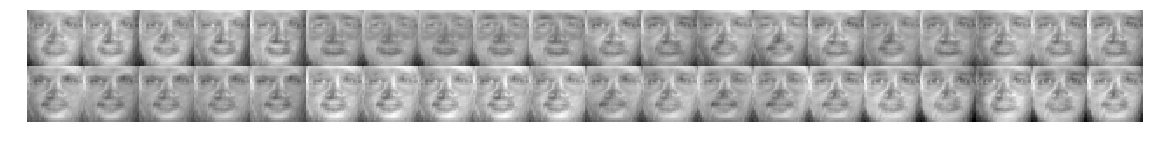

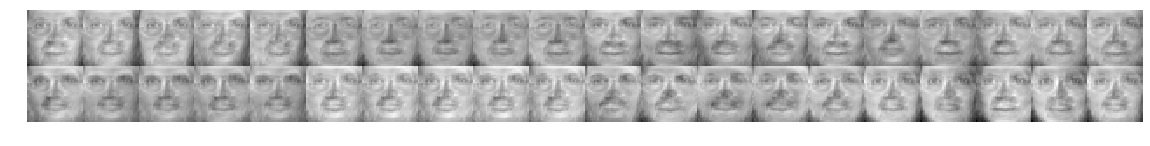

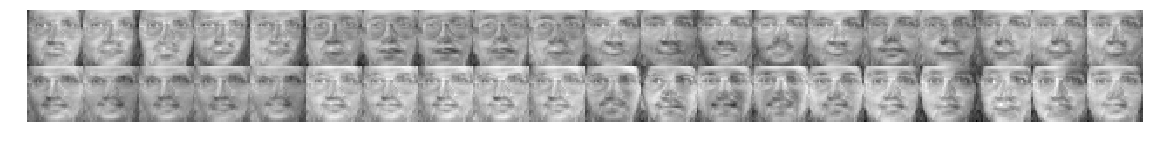

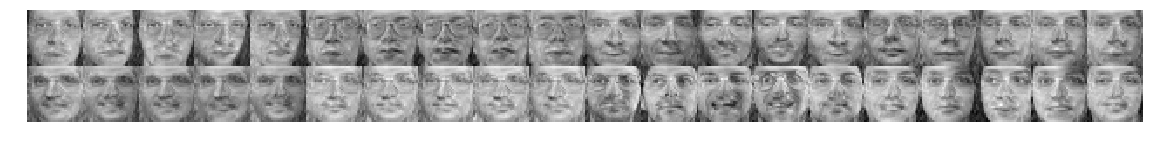

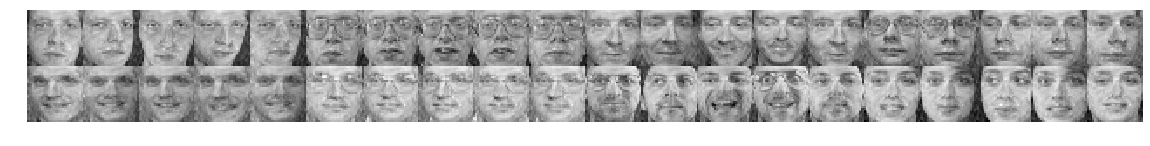

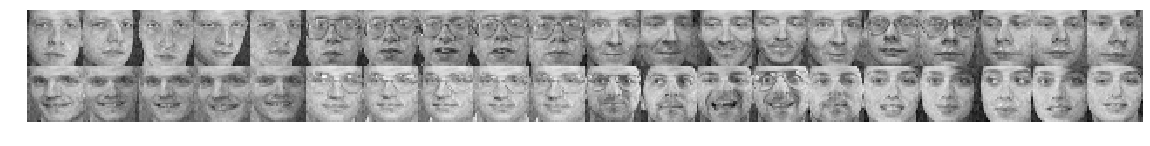

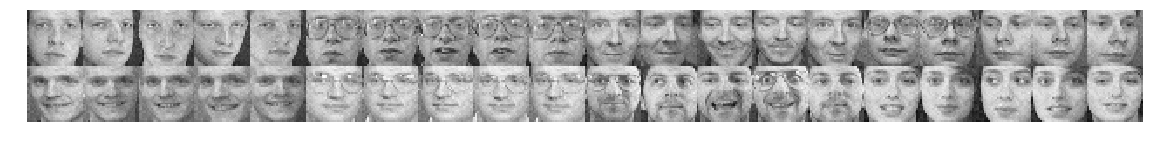

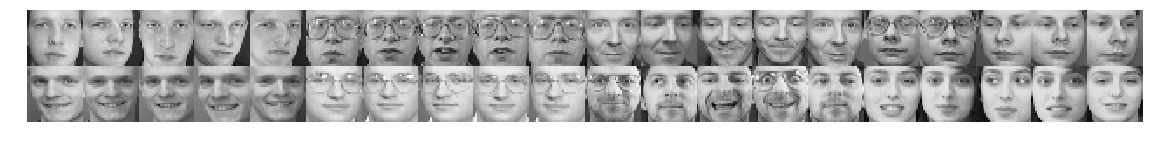

In [6]:
# 6. Recover face images form low dimensional space, visualize them
# begin answer
for dim in dimension:
    dim_eigenface = Eigenface[:,:dim]
    dimen_reduced_data = np.matmul(fea_Train, dim_eigenface)
    original_image = np.matmul(dimen_reduced_data, np.linalg.pinv(dim_eigenface))
    show_face(original_image)

show_face(fea_Train)
# end answer  

## You are encouraged to apply LDA on this dataset!

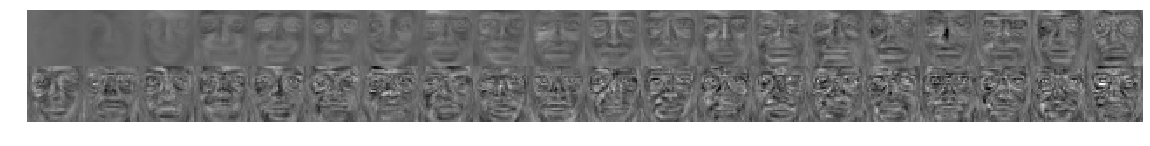

In [7]:
from LDA import LDA
from show_face import show_face
from knn import knn

# Your code here
# begin answer
Eigenval, Eigenvec = LDA(fea_Train, gnd_Train)
show_face(Eigenvec.T)
# end answer

In [8]:
for dim in dimension:
    dim_eigenface = Eigenvec[:,:dim]
    train_data = np.matmul(fea_Train, dim_eigenface)
    test_data = np.matmul(fea_Test, dim_eigenface)
    label = knn(test_data, train_data, gnd_Train, 1)
    test_error = np.sum(label != gnd_Test) / gnd_Test.shape[0]
    print('reduced dimensionality {}: test error = {}'.format(dim, test_error));

reduced dimensionality 8: test error = 0.27
reduced dimensionality 16: test error = 0.19
reduced dimensionality 32: test error = 0.135
reduced dimensionality 64: test error = 0.085
reduced dimensionality 128: test error = 0.06
reduced dimensionality 256: test error = 0.045
reduced dimensionality 512: test error = 0.045
